<a href="https://colab.research.google.com/github/rohithchandra11/stockPricePrediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM).
#LSTM is used to predict the closing stock price of a corporation(Apple Inc.) using the past 60 days stock price

In [11]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
plt.style.use('fivethirtyeight')

In [38]:
#get the stock quote
import yfinance as yf

df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

#show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550010,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821996,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801655,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.565025,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.124260,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.292770,137310400


In [39]:
#get the no of rows and columns in dataset
df.shape

(2002, 6)

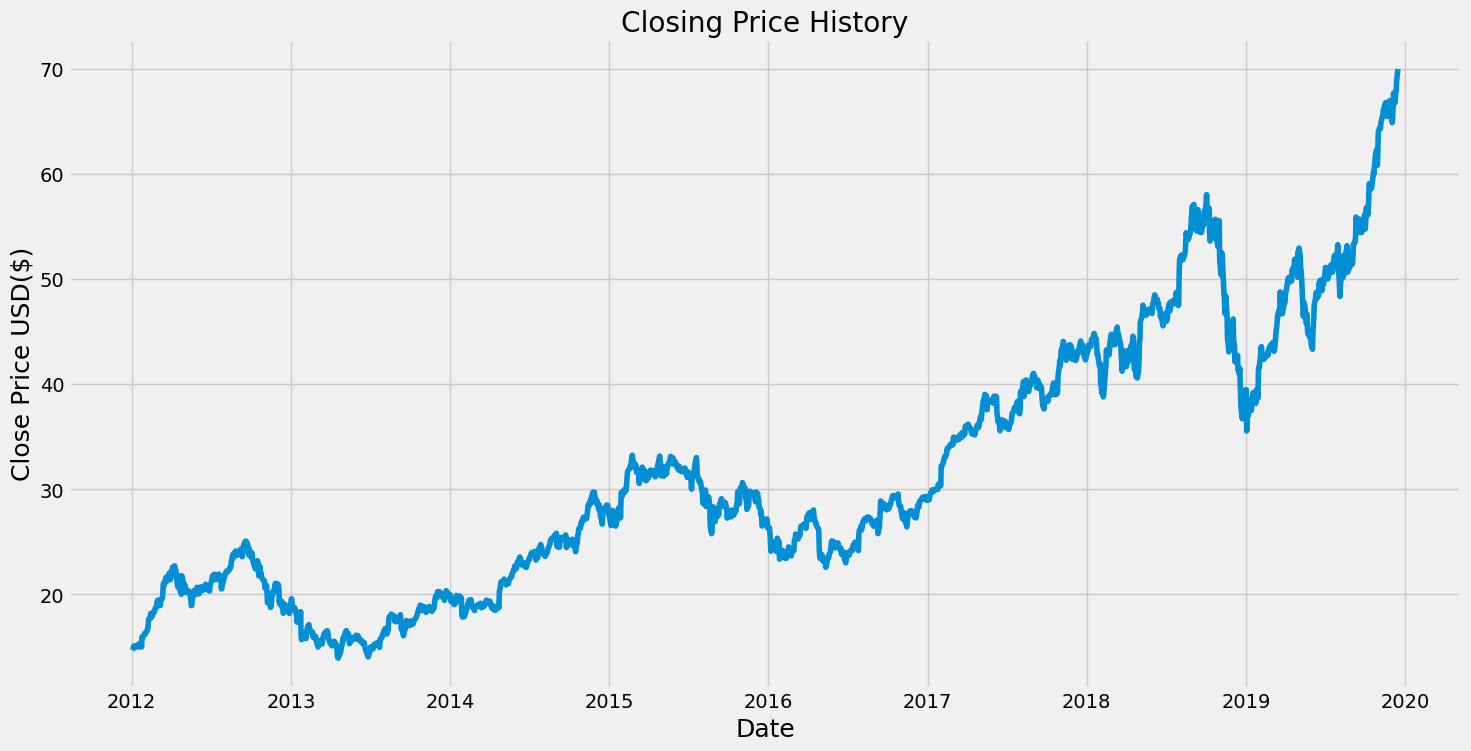

In [40]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [41]:
#create a new data frame with only the 'Close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get no of rows to train the model on
training_data_len = math.ceil( len(dataset)* .8)

training_data_len

1602

In [42]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [43]:
#Create the traning dataset
#created the scaled training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [44]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
#reshape the data
x_train= np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [46]:
#build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [47]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 59s 35ms/step - loss: 7.1907e-04


In [49]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#create the data sets x_test and y_test
x_test= []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [50]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [51]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [52]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 19ms/step


In [53]:
#get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean(predictions- y_test)**2)
rmse

0.26614057540893554

<ipython-input-54-c2161f274dd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


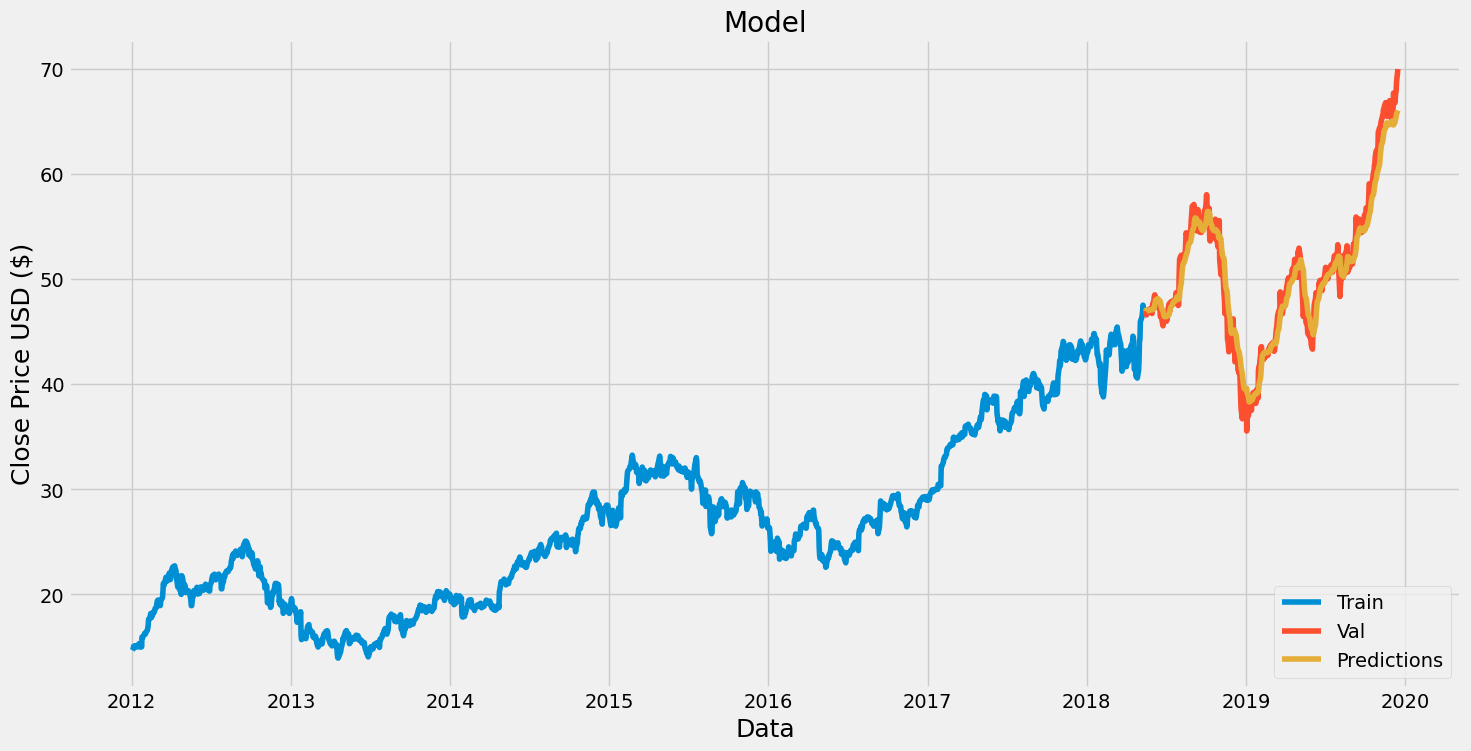

In [54]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions
#visualize the dataa
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [55]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,46.922306
2018-05-17,46.747501,47.023361
2018-05-18,46.577499,47.049892
2018-05-21,46.907501,47.017380
2018-05-22,46.790001,47.007751
...,...,...
2019-12-10,67.120003,65.047256
2019-12-11,67.692497,65.222832
2019-12-12,67.864998,65.454987


In [57]:


# Download the stock quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Create a new dataframe with only 'Close' column
new_df = apple_quote[['Close']]

# Create a MinMaxScaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data to be values between 0 and 1
new_df_scaled = scaler.fit_transform(new_df)

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df_scaled[-60:]

# Reshape the data
X_test = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

# Predict the stock price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 28ms/step
[[66.52158]]
